100
100


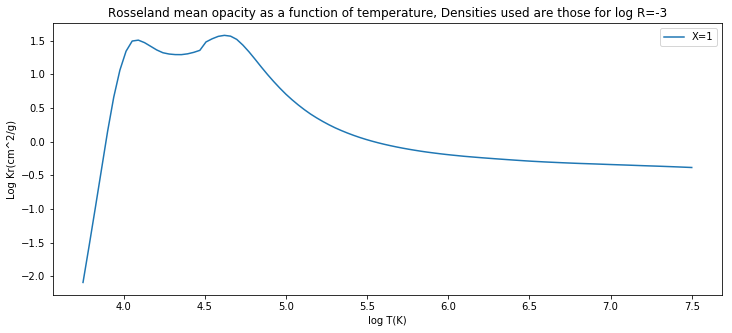

[-1.273458542014864, -1.2638874070964778, -1.2543355494014512, -1.2448028914333198, -1.2352893561620197, -1.225794867020111, -1.2163193478991106, -1.206862723145826, -1.1974249175587095, -1.1880058563842977, -1.1786054653136533, -1.1692236704788281, -1.159860398449406, -1.1505155762290367, -1.1411891312520301, -1.1318809913799717, -1.1225910848983716, -1.1133193405133628, -1.1040656873484025, -1.0948300549410228, -1.0856123732396274, -1.076412572600288, -1.0672305837835838, -1.0580663379514892, -1.0489197666642778, -1.0397908018774302, -1.030679375938626, -1.0215854215847329, -1.0125088719388011, -1.0034496605071417, -0.9944077211763844, -0.985382988210602, -0.9763753962484245, -0.9673848803002069, -0.9584113757452073, -0.9494548183288174, -0.9405151441597935, -0.9315922897075075, -0.9226861917992643, -0.913796787617601, -0.9049240146976198, -0.8960678109243889, -0.8872281145302889, -0.8784048640924633, -0.8695979985302473, -0.8608074571026173, -0.8520331794056983, -0.8432751053702475,

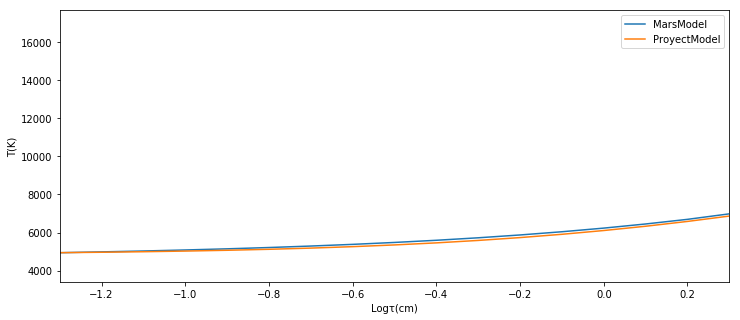

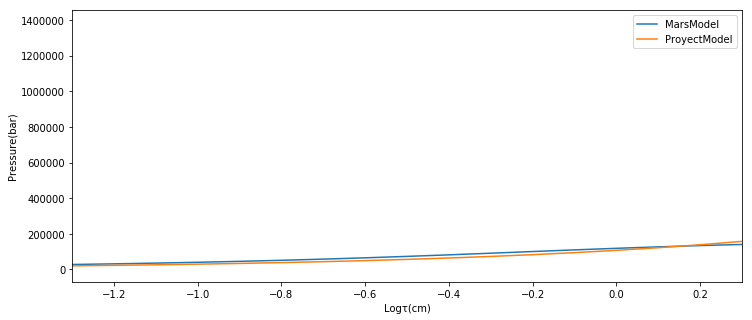

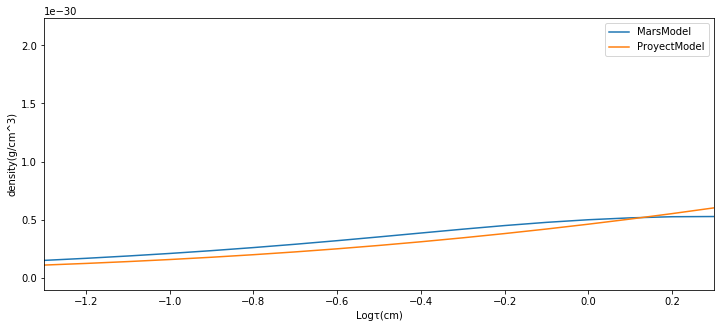

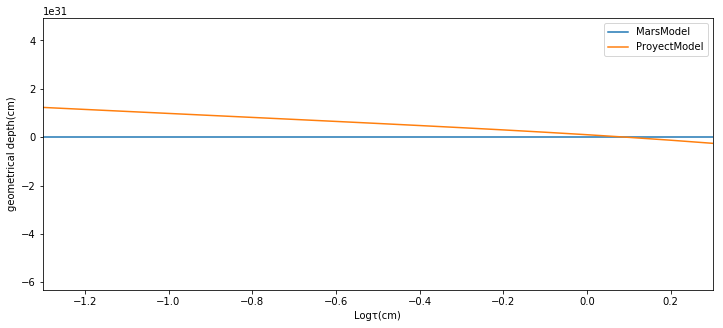

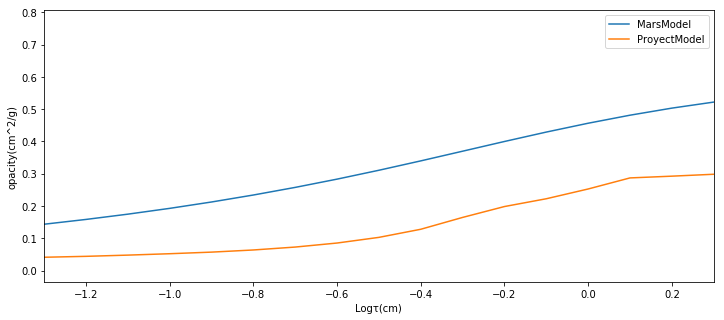

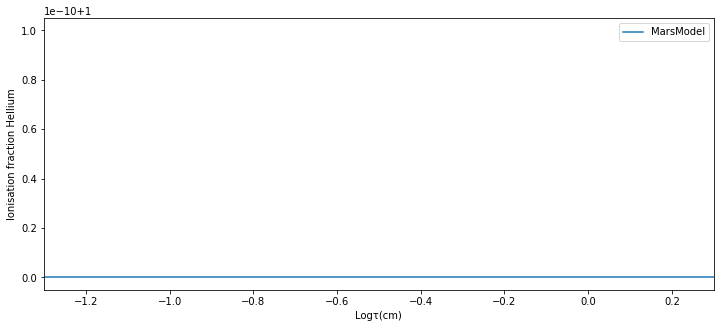

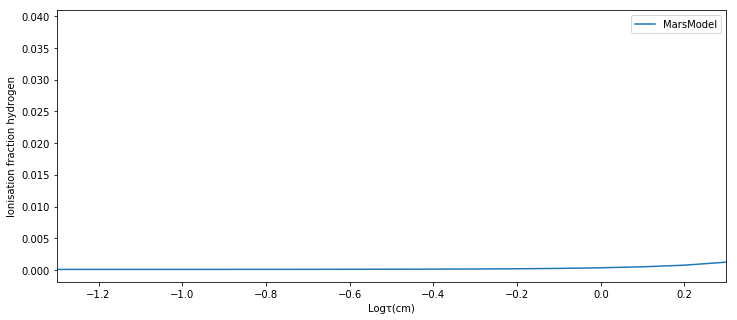

In [121]:
#we need to use some python library to made the code work
import math
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
    
    
"""                          Numerical Model   of a Stellar Atmosphere
"""

#We are gonna divide the code in 4 parts,according with the instructions given
                       
"""                              ---The opacity proyect---
"""
        
#For this part of the proyect we will create a flexible function(i.e with enought variable range) 
#which determines the opacity as a function of log T and log R(or pressure)

def opacitycalculator(LogT,LogR,pressure=0,Tin=0,witness=0):
    if witness!=0:
        LogR=np.log10(((1.6735575*10**-24)*pressure*1.32)/(((10**LogT)**4)*(10**18)*(8.314*10**7)))
    datarooseland=pd.read_excel('TableRooseland.xlsx') #we read the Pre-tabulated 2D grid (i.e table of Rosseland mean opacities with X=1 that we have saved separitly as a excel file)
    datasolar=pd.read_excel('TableSolarAtmosphere.xlsx') #we read the Pre-tabulated 2D grid (i.e table of solar atmosphere  with X=0.7 and z=0.02 that we have saved separitly as a excel file)
    #now we have to extract from this tables tausefull arrays (i.e LogT(we will call it X) LogR(Y) and the values of the opacity in each point(Z))
    X=datarooseland.columns.values    #Log R
    Y=datarooseland.index.values      #Log T
    Z=datarooseland.values      #values of the opacity
    X1=datasolar.columns.values    
    Y1=datasolar.index.values      
    Z1=datasolar.values 
    interpfunctionsolar=interpolate.interp2d(X1,Y1,Z1, kind='linear') #we use  scipy.interpolate) to create an interpolation function
    interpfunctionrooseland=interpolate.interp2d(X,Y,Z, kind='linear')
    opacity=[]  #empty array for saving the opacity values
    for i in LogT:     
        if i<=3.75:      #temperature region that correspond to the lowest temperature table(i.e solar atmosphhere)
            opacity=opacity+[interpfunctionsolar(LogR,i)[0]]   #we use the interpolation function for calculate the opacity
        if 3.75<i<4.5:   #temperature region of overlap   
            opacityfinal=0.95*interpfunctionsolar(LogR,i)[0]+ 0.05*interpfunctionrooseland(LogR,i)[0]      #smooth transition                               #we will use a lineal combination between the two opacitys
            opacity=opacity+[opacityfinal]
        if i>=4.5:             #temperature region that correspond to the highest temperature table
            opacity=opacity+[interpfunctionrooseland(LogR,i)[0]]
    #if pressure =! 0:
                            #In the case we want to calculate the opacity as a function of pressure we have to make a simple conversion between LogR and pressure using the following formula:
        
    return opacity   

LogTplot=np.linspace(3.75,7.5,100)
LogKrplot=(opacitycalculator(LogTplot,-3))
print(len(LogKrplot))
print(len(LogTplot))

fig1 = plt.figure(figsize = (12,5))
plt.plot(LogTplot, LogKrplot, label='X=1')
plt.xlabel('log T(K)')
plt.ylabel('Log Kr(cm^2/g)')
plt.title("Rosseland mean opacity as a function of temperature, Densities used are those for log R=-3")
plt.legend()
plt.show()



"""                           The Solar Atmosphere Model

"""
#first we will read the Mars Information
data3=pd.read_excel('MARCS_SOLAR.xlsx')
LogTaoMars=np.asarray(data3["Log Tao"].tolist())
TemperatureMars=np.asarray(data3["Temperature"].tolist())
pressuregasMars1=np.asarray(data3["pressure"].tolist())
DepthMars=np.asarray(data3["Depth"].tolist())
peMars=np.asarray(data3["Pe"].tolist())



#we can not get directly from the MARS table the density and the opacity and the number of electrons 
densitymars=(1.6735575*10**-24)*1.30*pressuregasMars/((8.314*10**7)*TemperatureMars) 
opacityMars=(10**(0.8*(np.log10(pressuregasMars))))*10**(-4.40)
pressuregasMars=pressuregasMars1+peMars #the total pressure is the sum of the pressure of the gas and the preessure due to electrons





taovalues1=np.linspace(0.2,2,len(LogTaoMars))
taovalues2=np.linspace(0.3,0.05,len(LogTaoMars))

P01=np.repeat(43892.496 ,len(LogTaoMars))
P02=np.repeat(54981.77 ,len(LogTaoMars))


temperature1=np.linspace(5040,5600,len(LogTaoMars))
pressure1=np.linspace(10000,100000,len(LogTaoMars))

temperature1final=np.log10(temperature1)
k1=(opacitycalculator(temperature1final,0,pressure1,5320,1))
print(k1)
#Pressure2=rk2a(f,x0,taovalues2)

def function(x,t):
    
    return np.repeat(27400/0.1,len(LogTaoMars))  


def rk4( f, x0, t, **kwargs):
    """Fourth-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.
    USAGE:
        x = rk4(f, x0, t)
    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.
    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """
    
    n = len(t)

    x = np.array( [x0 * 1.0] * n)
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        
        k1 = h * f(x[i],t[i], **kwargs)
        k2 = h * f(x[i] + k1 / 2.0, t[i] + h / 2.0, **kwargs)
        k3 = h * f(x[i] + k2 / 2.0, t[i] + h / 2.0, **kwargs)
        k4 = h * f(x[i] + k3, t[i] + h, **kwargs)
        
        x[i+1] = x[i] + (k1 + 2.0 * k2 + 2.0 * k3 + k4)/6.0
    
    return x

pressureproyectinwards=rk4(function,P01,taovalues1)
pressureproyectoutwards=rk4(function,P02,taovalues2)

#ressure1=rk2a(P01,taovalues1)

#we are goonna assume a grey atmosphere,where the opacity is independent of the frecuency
#the temperature as a function of the optical depth is given in the followin formula


teffsun=5777    #effective temperature of the sun as a blackbody

Temperatureproyect=teffsun*(((0.75*(10**(LogTaoMars)+(2/3))))**(0.25))

pressureproyect=(1135723220*10**(LogTaoMars))**(5/9)

densityproyect=(1.6735575*10**-24)*1.30*pressureproyect/((8.314*10**7)*Temperatureproyect) 

opacityproyect=10**np.asarray((opacitycalculator(np.log10(Temperatureproyect),5242,pressureproyect,5320,1)))

DepthProyect=((8.314*10**7)*Temperatureproyect*(11.7-np.log((1.1357*(10**(LogTaoMars))*10**9)**(5/9))))/(27400*(1.6735575*10**-24)*1.30)

















"""                          Comparison with MARCS Stellar Atmosphere Model

"""



fig2= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, TemperatureMars, label='MarsModel')
plt.plot(LogTaoMars, Temperatureproyect, label='ProyectModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('T(K)')
plt.xlim([-1.30,0.30])
plt.legend()
plt.show()

fig3= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, pressuregasMars, label='MarsModel')
plt.plot(LogTaoMars, pressureproyect, label='ProyectModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('Pressure(bar)')
plt.xlim([-1.30,0.30])
plt.legend()
plt.show()

fig4= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, densitymars, label='MarsModel')
plt.plot(LogTaoMars, densityproyect, label='ProyectModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('density(g/cm^3)')
plt.xlim([-1.30,0.30])
plt.legend()
plt.show()

fig5= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, DepthMars, label='MarsModel')
plt.plot(LogTaoMars, DepthProyect, label='ProyectModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('geometrical depth(cm)')
plt.xlim([-1.30,0.30])
plt.legend()

fig6= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, opacityMars, label='MarsModel')
plt.plot(LogTaoMars, opacityproyect, label='ProyectModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('opacity(cm^2/g)')
plt.xlim([-1.30,0.30])
plt.legend()



"""                           Ionisation Fractions of H and He

"""

nemars=peMars/(1.3806504*(10**-16)*TemperatureMars)
e=2.718281

ionfractionhydrogenpart1=(((10**30)*pressuregasMars*(5.8)*(TemperatureMars**3)*(e**((-9.1*10**5)/TemperatureMars)))/(TemperatureMars*1.3806504*(10**-16)*2*nemars**2))
ionfractionhydrogenpart2=2*nemars**2 -nemars -2.4*(10**15)*(TemperatureMars**(3/2))*(e**((-1.6*10**5)/TemperatureMars))
ionfracationhydrogenpart3=nemars*2.4*(10**15)*(TemperatureMars**(3/2))*(e**((-2.8*10**5)/TemperatureMars)) +5.8*(10**30)*(TemperatureMars**3)*(e**((-9.1*10**5)/TemperatureMars))  -nemars*2.4*(10**15)*(TemperatureMars**(3/2))*(e**((-1.6*10**5)/TemperatureMars))
#he ratio of the pressure gives the Ne/Ntotal.
ionfractionhellium=1-ionfractionhydrogenpart1*(ionfractionhydrogenpart2/ionfracationhydrogenpart3)
ionfractionhydrogen=peMars/pressuregasMars

fig6= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, ionfractionhellium, label='MarsModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('Ionisation fraction Hellium')
plt.xlim([-1.30,0.30])
plt.legend()
plt.show()

fig7= plt.figure(figsize = (12,5))
plt.plot(LogTaoMars, ionfractionhydrogen, label='MarsModel')
plt.xlabel('Logτ(cm)')
plt.ylabel('Ionisation fraction hydrogen')
plt.xlim([-1.30,0.30])
plt.legend()
plt.show()

